In [1]:
%cd -q '../'

In [2]:
import pickle
from importlib import reload

import helpers as hp
# reload(hp)
import numpy as np
import pandas as pd

from src.config import *

# import src.config
# reload(src.config);

# %matplotlib inline

## Loading intermediary files from artifacts

In [3]:
stage_name = "3_FeatureEngineering"

with open(
    file=f"notebooks/artifacts/{stage_name}_features_info.pkl", mode="rb"
) as f_write:
    features_info = pickle.load(f_write)

with open(
    file=f"notebooks/artifacts/{stage_name}_df_train.pkl", mode="rb"
) as f_write:
    df_train = pickle.load(f_write)

with open(
    file=f"notebooks/artifacts/{stage_name}_df_test.pkl", mode="rb"
) as f_write:
    df_test = pickle.load(f_write)

del stage_name

In [4]:
idx_to_remove = []

## Examining possible anomalies

### Analyzing '1stFlrM2' and '2ndFlrM2' together

Univariate analysis of '1stFlrM2' column
Histogram and box plot


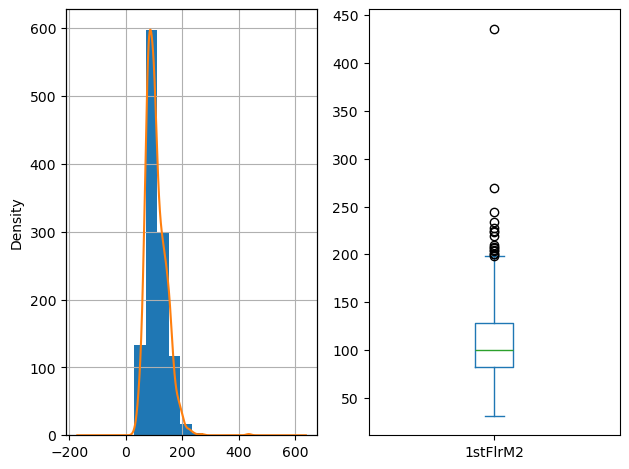

Descriptive statistics


count    1168.000000
mean      107.401243
std        35.594547
min        31.029615
25%        81.894030
50%       100.335283
75%       128.415227
max       435.901064
Name: 1stFlrM2, dtype: double[pyarrow]

Variance: 0.3314165284674165
Skewness: 1.3854286109634837
Kurtosis: 6.369275944969964

NA values
Count [n]: 0
Percentage [%]: 0.0%
Univariate analysis of '2ndFlrM2' column
Histogram and box plot


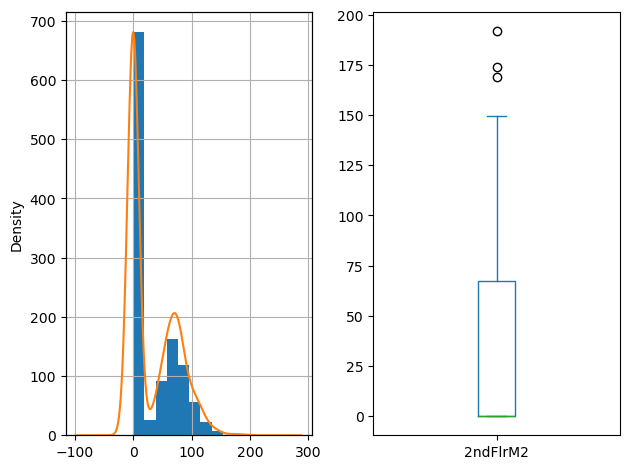

Descriptive statistics


count    1168.000000
mean       31.174299
std        40.199523
min         0.000000
25%         0.000000
50%         0.000000
75%        67.401156
max       191.844778
Name: 2ndFlrM2, dtype: double[pyarrow]

Variance: 1.2895084718597676
Skewness: 0.8598020261954217
Kurtosis: -0.4624028873934556

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [5]:
hp.show_hist_box_numerical_col(df_train, '1stFlrM2')
hp.show_hist_box_numerical_col(df_train, '2ndFlrM2')

I am not sure what to do here, I'm having doubts should we remove houses with too high 1stFlrM2.

### Analyzing houses with no full bathrooms above ground

In [6]:
_FullBaths_equal_0_subset = df_train.loc[
    df_train['FullBaths'] == 0,
    :
]

print("Numerical features")
display(_FullBaths_equal_0_subset[features_info['numerical']])
print("Binary features")
display(_FullBaths_equal_0_subset[features_info['binary']])
print("Ordinal features")
display(_FullBaths_equal_0_subset[features_info['ordinal']])
print("Nominal features")
display(_FullBaths_equal_0_subset[features_info['nominal']])

Numerical features


,LotFrontage,LotM2,OverallQ,OverallCond,YearBuilt,YearRemodAdd,MasVnrM2,BsmtFin1M2,BsmtFin2M2,BsmtUnfM2,...,%TotalBathsAll,TotalPorchM2,OutdoorM2,IndoorM2,TotalM2,%1stFlrM2,%2ndFlrM2,%TotalBsmtM2,%GarageM2,%OutdoorM2
Id,,,,,,,,,,,,,,,,,,,,,
189,64,651.993535,5,5,1979,1979,25.548336,100.892701,0.0,0.000000,...,40.000000,11.148365,538.280214,263.658828,801.939041,43.128964,0.000000,38.266385,18.604651,67.122335
1271,70,2192.047229,7,6,1979,1979,0.000000,116.872024,0.0,6.874825,...,42.857143,24.898015,2068.300380,319.772264,2388.072643,38.698431,5.578152,38.698431,17.024985,86.609609
1164,60,1198.449216,4,4,1969,1969,0.000000,111.297842,0.0,0.000000,...,40.000000,11.148365,1081.577192,265.331082,1346.908274,44.047619,0.000000,41.946779,14.005602,80.300731
917,50,836.127360,2,3,1949,1950,0.000000,4.645152,0.0,39.948307,...,20.000000,0.000000,791.533901,117.801055,909.334956,37.854890,0.000000,37.854890,24.290221,87.045362
376,70,930.888461,1,1,1922,1950,0.000000,32.516064,0.0,30.936712,...,33.333333,0.000000,846.904113,147.437124,994.341237,56.962823,0.000000,43.037177,0.000000,85.172382
598,53,364.365723,7,5,2006,2007,6.689019,0.000000,0.0,116.872024,...,36.363636,12.634813,234.115661,307.323256,541.438917,42.382104,0.000000,38.029021,19.588875,43.239533
54,68,4670.328724,9,5,1981,1987,0.000000,168.154502,0.0,2.972897,...,37.500000,86.306924,4499.201324,425.310117,4924.511441,40.235911,0.000000,40.235911,19.528178,91.363405
635,64,648.370316,6,5,1980,1980,0.000000,98.105610,0.0,0.000000,...,33.333333,29.728973,550.264706,249.723372,799.988077,39.285714,0.000000,39.285714,21.428571,68.784113


Binary features


,CentralAir
Id,
189,True
1271,True
1164,True
917,False
376,False
598,True
54,True
635,True


Ordinal features


,LotShape,LandContour,Utilities,LandSlope,ExterQ,ExterCond,BsmtQ,BsmtCond,BsmtExposure,BsmtFin1Type,...,Electrical,KitchenQ,Functional,FireplaceQ,GarageFinish,GarageQ,GarageCond,PavedDrive,PoolQ,FenceQ
Id,,,,,,,,,,,,,,,,,,,,,
189,Reg,Bnk,AllPub,Gtl,TA,TA,Gd,TA,Av,GLQ,...,SBrkr,TA,Typ,TA,Unf,TA,TA,Y,NA,NA
1271,Reg,Low,AllPub,Sev,Gd,TA,Gd,TA,Gd,GLQ,...,SBrkr,Gd,Typ,TA,Fin,TA,TA,Y,NA,NA
1164,Reg,Lvl,AllPub,Gtl,TA,TA,Gd,TA,Av,GLQ,...,SBrkr,TA,Typ,NA,Unf,Fa,TA,Y,NA,NA
917,Reg,Lvl,AllPub,Gtl,TA,TA,TA,TA,Av,BLQ,...,FuseA,TA,Typ,NA,Unf,TA,TA,Y,NA,NA
376,IR1,Low,AllPub,Sev,Fa,Fa,Fa,Po,Gd,BLQ,...,FuseA,Fa,Maj1,NA,NA,NA,NA,Y,NA,NA
598,Reg,Lvl,AllPub,Gtl,Gd,TA,Ex,TA,Av,Unf,...,SBrkr,Gd,Typ,Gd,Fin,TA,TA,Y,NA,NA
54,IR1,Low,AllPub,Gtl,Gd,TA,Ex,TA,Gd,GLQ,...,SBrkr,Gd,Typ,Gd,Fin,TA,TA,Y,NA,NA
635,Reg,Lvl,AllPub,Gtl,TA,TA,TA,TA,No,GLQ,...,SBrkr,TA,Typ,NA,Unf,TA,TA,Y,NA,GdPrv


Nominal features


,MSSubClass,MSZoning,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,HeatingType,GarageType,MiscFeature,MoSold,SaleType,SaleCond
Id,,,,,,,,,,,,,,,,,,,,,
189,90,RL,NA_str,Inside,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,...,Plywood,Plywood,Stone,CBlock,GasA,Detchd,NA_str,6,WD,Alloca
1271,40,RL,NA_str,Inside,ClearCr,Norm,Norm,1Fam,1Story,Shed,...,Plywood,Plywood,NA_str,PConc,GasA,Attchd,NA_str,4,WD,Normal
1164,90,RL,NA_str,Inside,Sawyer,Feedr,Norm,Duplex,SFoyer,Gable,...,Plywood,Plywood,NA_str,CBlock,GasA,CarPort,NA_str,1,WD,Alloca
917,20,C (all),NA_str,Inside,IDOTRR,Norm,Norm,1Fam,1Story,Gable,...,AsbShng,AsbShng,NA_str,CBlock,GasA,Detchd,NA_str,10,WD,Abnorml
376,30,RL,NA_str,Inside,Edwards,Norm,Norm,1Fam,1Story,Gable,...,Wd Sdng,Wd Sdng,NA_str,BrkTil,GasA,NA_str,NA_str,3,WD,Normal
598,120,RL,NA_str,Inside,Blmngtn,Norm,Norm,TwnhsE,1Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NA_str,2,New,Partial
54,20,RL,NA_str,Inside,Veenker,Norm,Norm,1Fam,1Story,Gable,...,WdShing,Wd Shng,NA_str,CBlock,GasA,Attchd,NA_str,11,WD,Normal
635,90,RL,NA_str,Inside,OldTown,Norm,Norm,Duplex,SFoyer,Gable,...,Plywood,Plywood,NA_str,CBlock,GasA,Detchd,Shed,6,WD,Normal


Only one house that doesn't have full bathroom above ground doesn't have full bathroom in the basement, but the rest have. That one house will be dropped from the data set.

In [7]:
# Deleting houses with no shower or bathtub
_houses_with_no_shower_or_bathtub = df_train.loc[
    df_train['BsmtFullBaths'] + df_train['FullBaths'] == 0,
    :
]

idx_to_remove.extend(_houses_with_no_shower_or_bathtub.index)

df_train.drop(_houses_with_no_shower_or_bathtub.index, inplace=True)

del _FullBaths_equal_0_subset, _houses_with_no_shower_or_bathtub

### Analyzing houses with miscellaneous value above 10,000

In [8]:
_MiscVal_above_10000_subset = df_train.loc[df_train["MiscVal"] > 10_000,]

print("Numerical features")
display(_MiscVal_above_10000_subset[features_info["numerical"]])
print("Binary features")
display(_MiscVal_above_10000_subset[features_info["binary"]])
print("Ordinal features")
display(_MiscVal_above_10000_subset[features_info["ordinal"]])
print("Nominal features")
display(_MiscVal_above_10000_subset[features_info["nominal"]])

del _MiscVal_above_10000_subset

Numerical features


,LotFrontage,LotM2,OverallQ,OverallCond,YearBuilt,YearRemodAdd,MasVnrM2,BsmtFin1M2,BsmtFin2M2,BsmtUnfM2,...,%TotalBathsAll,TotalPorchM2,OutdoorM2,IndoorM2,TotalM2,%1stFlrM2,%2ndFlrM2,%TotalBsmtM2,%GarageM2,%OutdoorM2
Id,,,,,,,,,,,,,,,,,,,,,
347,70,1186.557627,6,8,1960,1998,0.0,46.265714,0.0,42.735398,...,16.666667,0.0,1097.556515,205.96604,1303.522554,43.211547,0.0,43.211547,13.576906,84.199273


Binary features


,CentralAir
Id,
347,True


Ordinal features


,LotShape,LandContour,Utilities,LandSlope,ExterQ,ExterCond,BsmtQ,BsmtCond,BsmtExposure,BsmtFin1Type,...,Electrical,KitchenQ,Functional,FireplaceQ,GarageFinish,GarageQ,GarageCond,PavedDrive,PoolQ,FenceQ
Id,,,,,,,,,,,,,,,,,,,,,
347,IR1,Lvl,AllPub,Gtl,TA,Gd,TA,TA,Mn,BLQ,...,SBrkr,TA,Typ,NA,RFn,TA,TA,Y,NA,NA


Nominal features


,MSSubClass,MSZoning,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,HeatingType,GarageType,MiscFeature,MoSold,SaleType,SaleCond
Id,,,,,,,,,,,,,,,,,,,,,
347,20,RL,NA_str,CulDSac,NAmes,Norm,Norm,1Fam,1Story,Hip,...,MetalSd,MetalSd,NA_str,CBlock,GasA,Attchd,Gar2,4,WD,Normal


### Examinig houses with no bedrooms

In [9]:
pd.set_option('display.max_columns', None)
display(df_train.loc[df_train['Bedrooms'] == 0, ['LotM2', 'TotalBsmtM2', '1stFlrM2', '2ndFlrM2', 'GrLivM2',
                                     'BsmtFullBaths', 'BsmtHalfBaths', 'FullBaths', 'HalfBaths', 'Bedrooms', 'Kitchens',
                                     'TotalRooms', 'GarageType', 'GarageM2', 'WoodDeckM2', 'OpenPorchM2', 'EnclosedPorchM2',
                                     '3SsnPorchM2', 'ScreenPorchM2', 'PoolM2', 'MiscFeature', 'TotalHalfBathsAll',
                                     'TotalFullBathsAll', 'TotalBathsAll', 'TotalRoomsWithBathsAll', 'OtherRooms',
                                     '%BsmtFullBaths', '%BsmtHalfBaths', '%FullBaths', '%HalfBaths', '%Bedrooms', '%Kitchens',
                                     '%OtherRooms', '%TotalHalfBathsAll', '%TotalFullBathsAll', '%TotalBathsAll',
                                     'TotalPorchM2', 'DateSold', 'OutdoorM2', 'IndoorM2', 'TotalM2', '%1stFlrM2', '%2ndFlrM2',
                                     '%TotalBsmtM2', '%GarageM2', '%OutdoorM2']])
pd.reset_option('display.max_columns')

,LotM2,TotalBsmtM2,1stFlrM2,2ndFlrM2,GrLivM2,BsmtFullBaths,BsmtHalfBaths,FullBaths,HalfBaths,Bedrooms,Kitchens,TotalRooms,GarageType,GarageM2,WoodDeckM2,OpenPorchM2,EnclosedPorchM2,3SsnPorchM2,ScreenPorchM2,PoolM2,MiscFeature,TotalHalfBathsAll,TotalFullBathsAll,TotalBathsAll,TotalRoomsWithBathsAll,OtherRooms,%BsmtFullBaths,%BsmtHalfBaths,%FullBaths,%HalfBaths,%Bedrooms,%Kitchens,%OtherRooms,%TotalHalfBathsAll,%TotalFullBathsAll,%TotalBathsAll,TotalPorchM2,DateSold,OutdoorM2,IndoorM2,TotalM2,%1stFlrM2,%2ndFlrM2,%TotalBsmtM2,%GarageM2,%OutdoorM2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1271,2192.047229,123.746849,123.746849,17.837384,141.584233,2,0,0,1,0,1,4,Attchd,54.441181,24.898015,0.000000,0.0,0.0,0.0,0.0,NA_str,1,2,3,7,3,28.571429,0.0,0.0,14.285714,0.0,14.285714,42.857143,14.285714,28.571429,42.857143,24.898015,2010-04-01,2068.300380,319.772264,2388.072643,38.698431,5.578152,38.698431,17.024985,86.609609
1164,1198.449216,111.297842,116.872024,0.000000,116.872024,2,0,0,2,0,2,6,CarPort,37.161216,11.148365,0.000000,0.0,0.0,0.0,0.0,NA_str,2,2,4,10,4,20.000000,0.0,0.0,20.000000,0.0,20.000000,40.000000,20.000000,20.000000,40.000000,11.148365,2008-01-01,1081.577192,265.331082,1346.908274,44.047619,0.000000,41.946779,14.005602,80.300731
54,4670.328724,171.127400,171.127400,0.000000,171.127400,2,0,0,1,0,1,5,Attchd,83.055318,79.617905,6.689019,0.0,0.0,0.0,0.0,NA_str,1,2,3,8,4,25.000000,0.0,0.0,12.500000,0.0,12.500000,50.000000,12.500000,25.000000,37.500000,86.306924,2006-11-01,4499.201324,425.310117,4924.511441,40.235911,0.000000,40.235911,19.528178,91.363405
635,648.370316,98.105610,98.105610,0.000000,98.105610,2,0,0,0,0,2,4,Detchd,53.512151,24.526403,5.202570,0.0,0.0,0.0,0.0,Shed,0,2,2,6,2,33.333333,0.0,0.0,0.000000,0.0,33.333333,33.333333,0.000000,33.333333,33.333333,29.728973,2010-06-01,550.264706,249.723372,799.988077,39.285714,0.000000,39.285714,21.428571,68.784113


### Examinig houses with no kitchens

In [10]:
pd.set_option('display.max_columns', None)
display(df_train.loc[df_train['Kitchens'] == 0, ['LotM2', 'TotalBsmtM2', '1stFlrM2', '2ndFlrM2', 'GrLivM2',
                                     'BsmtFullBaths', 'BsmtHalfBaths', 'FullBaths', 'HalfBaths', 'Bedrooms', 'Kitchens',
                                     'TotalRooms', 'GarageType', 'GarageM2', 'WoodDeckM2', 'OpenPorchM2', 'EnclosedPorchM2',
                                     '3SsnPorchM2', 'ScreenPorchM2', 'PoolM2', 'MiscFeature', 'TotalHalfBathsAll',
                                     'TotalFullBathsAll', 'TotalBathsAll', 'TotalRoomsWithBathsAll', 'OtherRooms',
                                     '%BsmtFullBaths', '%BsmtHalfBaths', '%FullBaths', '%HalfBaths', '%Bedrooms', '%Kitchens',
                                     '%OtherRooms', '%TotalHalfBathsAll', '%TotalFullBathsAll', '%TotalBathsAll',
                                     'TotalPorchM2', 'DateSold', 'OutdoorM2', 'IndoorM2', 'TotalM2', '%1stFlrM2', '%2ndFlrM2',
                                     '%TotalBsmtM2', '%GarageM2', '%OutdoorM2']])
pd.reset_option('display.max_columns')

,LotM2,TotalBsmtM2,1stFlrM2,2ndFlrM2,GrLivM2,BsmtFullBaths,BsmtHalfBaths,FullBaths,HalfBaths,Bedrooms,Kitchens,TotalRooms,GarageType,GarageM2,WoodDeckM2,OpenPorchM2,EnclosedPorchM2,3SsnPorchM2,ScreenPorchM2,PoolM2,MiscFeature,TotalHalfBathsAll,TotalFullBathsAll,TotalBathsAll,TotalRoomsWithBathsAll,OtherRooms,%BsmtFullBaths,%BsmtHalfBaths,%FullBaths,%HalfBaths,%Bedrooms,%Kitchens,%OtherRooms,%TotalHalfBathsAll,%TotalFullBathsAll,%TotalBathsAll,TotalPorchM2,DateSold,OutdoorM2,IndoorM2,TotalM2,%1stFlrM2,%2ndFlrM2,%TotalBsmtM2,%GarageM2,%OutdoorM2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
955,873.288576,87.793373,91.044979,0.0,91.044979,0,2,2,0,4,0,4,NA_str,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA_str,2,2,4,8,0,0.0,25.0,25.0,0.0,50.0,0.0,0.0,25.0,25.0,50.0,0.0,2006-10-01,782.243597,178.838352,961.081949,50.909091,0.0,49.090909,0.0,81.391977


### Correlation with derived features

In [11]:
corrs_and_pvals_with_derived = hp.get_correlations_and_pvals(df_train, features_info['numerical'])

display(corrs_and_pvals_with_derived.head(50))

,,r,pvalues
LotM2,OutdoorM2,0.999405,0.000000e+00
YearBuilt,Year_Difference_Sold_Built,-0.999011,0.000000e+00
LotM2,TotalM2,0.998089,0.000000e+00
Year_Difference_Sold_Remod,YearRemodAdd,-0.997948,0.000000e+00
OutdoorM2,TotalM2,0.996439,0.000000e+00
BsmtHalfBaths,%BsmtHalfBaths,0.983114,0.000000e+00
HalfBaths,%HalfBaths,0.969394,0.000000e+00
%TotalHalfBathsAll,TotalHalfBathsAll,0.965992,0.000000e+00
%BsmtFullBaths,BsmtFullBaths,0.951431,0.000000e+00
%2ndFlrM2,2ndFlrM2,0.935893,0.000000e+00


In [12]:
display(corrs_and_pvals_with_derived[corrs_and_pvals_with_derived['r'] < 0].head(50))
del corrs_and_pvals_with_derived

r  \
YearBuilt                  Year_Difference_Sold_Built  -0.999011   
Year_Difference_Sold_Remod YearRemodAdd                -0.997948   
%Kitchens                  TotalRoomsWithBathsAll      -0.726262   
YearBuilt                  Year_Difference_Remod_Built -0.723478   
%1stFlrM2                  %2ndFlrM2                   -0.678000   
                           2ndFlrM2                    -0.669919   
%OtherRooms                %Bedrooms                   -0.654151   
TotalBathsAll              %Kitchens                   -0.653676   
%2ndFlrM2                  %TotalBsmtM2                -0.635990   
GrLivM2                    %Kitchens                   -0.635259   
%Kitchens                  OtherRooms                  -0.633312   
TotalRooms                 %Kitchens                   -0.622612   
%Kitchens                  IndoorM2                    -0.603971   
Year_Difference_Sold_Remod YearBuilt                   -0.601216   
YearRemodAdd               Year_Difference_Sold_Built  -0.597457   
OverallQ                   %Kitchens                   -0.586074   
2ndFlrM2                   %TotalBsmtM2                -0.580124   
OverallQ                   Year_Difference_Sold_Built  -0.567272   
%Bedrooms                  OtherRooms                  -0.564632   
Year_Difference_Sold_Remod OverallQ                    -0.555518   
GarageCars                 Year_Difference_Sold_Built  -0.531412   
Year_Difference_Sold_Built TotalBathsAll               -0.524497   
%TotalBathsAll             Year_Difference_Sold_Built  -0.515621   
Year_Difference_Sold_Remod TotalOverall                -0.506271   
HalfBaths                  %1stFlrM2                   -0.505196   
BsmtFin1M2                 BsmtUnfM2                   -0.495773   
TotalFullBathsAll          Year_Difference_Sold_Built  -0.488127   
FullBaths                  %Kitchens                   -0.486192   
Year_Difference_Sold_Built GarageM2                    -0.481066   
TotalFullBathsAll          %Kitchens                   -0.478914   
%HalfBaths                 %1stFlrM2                   -0.470644   
%Bedrooms                  TotalBathsAll               -0.467190   
%Kitchens                  2ndFlrM2                    -0.461634   
                           TotalHalfBathsAll           -0.457089   
                           HalfBaths                   -0.455184   
Year_Difference_Sold_Built FullBaths                   -0.454832   
TotalOverall               %Kitchens                   -0.454219   
%Bedrooms                  %TotalBathsAll              -0.450418   
TotalHalfBathsAll          %1stFlrM2                   -0.448902   
BsmtUnfM2                  %BsmtFullBaths              -0.446043   
Year_Difference_Sold_Remod TotalBathsAll               -0.437485   
TotalFullBathsAll          %Bedrooms                   -0.436807   
Year_Difference_Sold_Remod FullBaths                   -0.436788   
BsmtFullBaths              BsmtUnfM2                   -0.435205   
%Kitchens                  GarageCars                  -0.434904   
                           Bedrooms                    -0.430436   
TotalFullBathsAll          Year_Difference_Sold_Remod  -0.418207   
GarageCars                 Year_Difference_Sold_Remod  -0.414045   
%Kitchens                  GarageM2                    -0.408911   
%TotalHalfBathsAll         %1stFlrM2                   -0.403167   

                                                              pvalues  
YearBuilt                  Year_Difference_Sold_Built    0.000000e+00  
Year_Difference_Sold_Remod YearRemodAdd                  0.000000e+00  
%Kitchens                  TotalRoomsWithBathsAll       7.402610e-192  
YearBuilt                  Year_Difference_Remod_Built  1.054226e-189  
%1stFlrM2                  %2ndFlrM2                    6.369364e-158  
                           2ndFlrM2                     7.221916e-153  
%OtherRooms                %Bedrooms                    1.880112e-143  
TotalBathsAll     

### Correlation with derived features with label

In [13]:
display(df_train[features_info['numerical']].corrwith(df_train[LABEL]).sort_values(ascending=False, key=lambda x: np.abs(x)))
display(df_train[features_info['binary']].corrwith(df_train[LABEL]).sort_values(ascending=False, key=lambda x: np.abs(x)))

IndoorM2                  0.810333
OverallQ                  0.791298
GrLivM2                   0.714451
TotalRoomsWithBathsAll    0.646981
GarageCars                0.638978
                            ...   
%BsmtHalfBaths           -0.030536
MiscVal                  -0.028638
%TotalBsmtM2              0.024137
BsmtHalfBaths            -0.006398
BsmtFin2M2                0.000143
Length: 62, dtype: float64

CentralAir    0.255603
dtype: float64

In [14]:
derived_numerical_for_deletion = [
    'OutdoorM2', 'TotalM2', '%BsmtHalfBaths',
    '%HalfBaths', '%TotalHalfBathsAll', '%BsmtFullBaths',
    '%2ndFlrM2', 
]

df_train.drop(columns=derived_numerical_for_deletion, inplace=True)
df_test.drop(columns=derived_numerical_for_deletion, inplace=True)
features_info['derived_numerical'] = [c for c in features_info['derived_numerical'] if c not in derived_numerical_for_deletion]
features_info['numerical'] = [c for c in features_info['numerical'] if c not in derived_numerical_for_deletion]

# ['TotalRoomsWithBathsAll  TotalRooms',
#  'TotalHalfBathsAll       HalfBaths',
#  'GrLivM2                 TotalRoomsWithBathsAll',
#  '%OtherRooms             OtherRooms',
#  '%TotalHalfBathsAll      HalfBaths',
#  'TotalRooms              OtherRooms',
#  'IndoorM2                GrLivM2',
#  'TotalRooms              GrLivM2 ',
#  'OtherRooms              TotalRoomsWithBathsAll',
#  'TotalBathsAll           TotalFullBathsAll'
#  ]

### Correlation with label

In [15]:
display(df_train[features_info['derived_numerical']].corrwith(df_train[LABEL]).sort_values(ascending=False, key=lambda x: np.abs(x)))

IndoorM2                       0.810333
TotalRoomsWithBathsAll         0.646981
OtherRooms                     0.635032
TotalBathsAll                  0.622988
%Kitchens                     -0.601003
TotalOverall                   0.592652
TotalFullBathsAll              0.580533
Year_Difference_Sold_Built    -0.523444
Year_Difference_Sold_Remod    -0.514127
%Bedrooms                     -0.422573
%OtherRooms                    0.395669
TotalPorchM2                   0.387619
%TotalBathsAll                 0.306860
TotalHalfBathsAll              0.267083
%1stFlrM2                     -0.253450
Year_Difference_Remod_Built   -0.207314
%TotalFullBathsAll             0.183877
%FullBaths                     0.124911
%GarageM2                      0.102660
%OutdoorM2                    -0.072484
%TotalBsmtM2                   0.024137
dtype: float64

In [16]:
pd.set_option('display.max_columns', None)
_GrLivM2_below_50_subset_idx = df_train[df_train['GrLivM2'] < 50].index
display(df_train.loc[_GrLivM2_below_50_subset_idx,])
pd.reset_option('display.max_columns')

,MSSubClass,MSZoning,LotFrontage,LotM2,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQ,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrM2,ExterQ,ExterCond,Foundation,BsmtQ,BsmtCond,BsmtExposure,BsmtFin1Type,BsmtFin1M2,BsmtFin2Type,BsmtFin2M2,BsmtUnfM2,TotalBsmtM2,HeatingType,HeatingQ,CentralAir,Electrical,1stFlrM2,2ndFlrM2,LowQualFinM2,GrLivM2,BsmtFullBaths,BsmtHalfBaths,FullBaths,HalfBaths,Bedrooms,Kitchens,KitchenQ,TotalRooms,Functional,Fireplaces,FireplaceQ,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageM2,GarageQ,GarageCond,PavedDrive,WoodDeckM2,OpenPorchM2,EnclosedPorchM2,3SsnPorchM2,ScreenPorchM2,PoolM2,PoolQ,FenceQ,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCond,SalePrice,TotalOverall,Year_Difference_Remod_Built,Year_Difference_Sold_Built,Year_Difference_Sold_Remod,TotalHalfBathsAll,TotalFullBathsAll,TotalBathsAll,TotalRoomsWithBathsAll,OtherRooms,%FullBaths,%Bedrooms,%Kitchens,%OtherRooms,%TotalFullBathsAll,%TotalBathsAll,TotalPorchM2,DateSold,IndoorM2,%1stFlrM2,%TotalBsmtM2,%GarageM2,%OutdoorM2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
917,20,C (all),50,836.127360,False,NA_str,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,NA_str,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,4.645152,Unf,0.0,39.948307,44.593459,GasA,TA,False,FuseA,44.593459,0.0,0.0,44.593459,1,0,0,0,1,1,TA,4,Typ,0,NA,Detchd,1958,Unf,1,28.614136,TA,TA,Y,0.000000,0.0,0.000000,0.0,0.0,0.0,NA,NA,NA_str,0,10,2006,WD,Abnorml,35311,5,1,57,56,0,1,1,5,2,0.000000,20.000000,20.000000,40.0,20.000000,20.000000,0.000000,2006-10-01,117.801055,37.854890,37.854890,24.290221,87.045362
1101,30,RL,60,780.385536,False,NA_str,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA_str,0.0,TA,TA,CBlock,TA,Fa,No,Rec,26.941882,Unf,0.0,0.000000,26.941882,GasA,TA,False,FuseF,40.691532,0.0,0.0,40.691532,0,0,1,0,1,1,Fa,3,Typ,0,NA,Detchd,1930,Unf,1,22.854148,TA,TA,N,0.000000,0.0,0.000000,0.0,0.0,0.0,NA,NA,NA_str,0,1,2009,WD,Normal,60000,7,30,89,59,0,1,1,4,1,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,0.000000,2009-01-01,90.487561,44.969199,29.774127,25.256674,89.100269
534,20,RL,50,464.515200,False,NA_str,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,NA_str,0.0,Fa,Fa,Slab,NA,NA,NA,NA,0.000000,NA,0.0,0.000000,0.000000,GasA,Fa,False,FuseF,31.029615,0.0,0.0,31.029615,0,0,1,0,1,1,Fa,2,Typ,0,NA,NA_str,0,NA,0,0.000000,NA,NA,N,0.000000,0.0,0.000000,0.0,0.0,0.0,NA,NA,NA_str,0,1,2007,WD,Normal,39300,4,4,61,57,0,1,1,3,0,33.333333,33.333333,33.333333,0.0,33.333333,33.333333,0.000000,2007-01-01,31.029615,100.000000,0.000000,0.000000,93.320000
30,30,RM,60,587.518825,False,NA_str,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,NA_str,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.000000,Unf,0.0,48.309581,48.309581,GasA,Fa,False,SBrkr,48.309581,0.0,0.0,48.309581,0,0,1,0,1,1,Fa,4,Typ,0,NA,Detchd,1920,Unf,1,22.296730,Fa,TA,Y,4.552249,0.0,8.082564,0.0,0.0,0.0,NA,NA,NA_str,0,5,2008,WD,Normal,68500,10,23,81,58,0,1,1,5,2,20.000000,20.000000,20.000000,40.0,20.000000,20.000000,12.634813,2008-05-01,118.915891,40.625000,40.625000,18.750000,81.931112


### Delete columns scheduled for deletion

In [17]:
df_train, _ = hp.drop_columns_scheduled_for_deletion(df_train, features_info)
df_test, features_info = hp.drop_columns_scheduled_for_deletion(df_train, features_info)

In [18]:
stage_name = "4_PostFEAnalysis"

with open(
    file=f"notebooks/artifacts/{stage_name}_features_info.pkl", mode="wb"
) as file:
    pickle.dump(features_info, file)

df_train.to_pickle(path=f"notebooks/artifacts/{stage_name}_df_train.pkl")
df_test.to_pickle(path=f"notebooks/artifacts/{stage_name}_df_test.pkl")

del stage_name